In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/MyDrive/TPS')

In [56]:

import numpy as np
import matplotlib.pyplot as plt 
import random 

class random_generator(object):
    def __init__(self,num=20, range_=(0,100), start_point=0):
        self.points = np.random.randint(*range_,size=(num,2))
        #self.destination = np.random.randint(0,num)
        self.start_point = start_point

    def visualize(self):
        plt.figure(figsize=(5,5))
        plt.scatter(self.points[:,0],self.points[:,1], color='red')
        plt.scatter(self.points[self.start_point][0], self.points[self.start_point][1], marker='*', color='Blue', label='start',s=200)
        plt.grid()
        plt.title("generated points (random)")
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
        
    def get_points(self):
        return self.points


def distance_matric(from_, to_):
    return np.sqrt((from_[0]-to_[0])**2 +(from_[1]-to_[1])**2)


class environment(object):
    def __init__(self, points_obj):
        self.points_obj = points_obj
        self.points = self.points_obj.get_points()
        self.current_position = self.points_obj.start_point
        self.state = -np.ones(len(self.points_obj.points)) # initailize with 0 , [0,0...] ,
        self.state[self.current_position]=1

        self.next_state = self.state
        self.history = [self.current_position] 
        self.reward_history=[]
       

    def is_done(self): 
        done_mask = False 
        if sum(self.state) == len(self.points_obj.points): # 다 돌았다. :
            done_mask = True 

        return done_mask

    def reward(self, action):
        distance = distance_matric(from_ =self.points[self.current_position], to_= self.points[action])
        return -distance 
    
    def reset(self, random_init =True):
        self.points_obj = self.points_obj
        self.points = self.points_obj.get_points()
        self.current_position = self.points_obj.start_point
        self.state = -np.ones(len(self.points_obj.points)) # initailize with 0 , [0,0...] ,

        if random_init == True :
            rand = np.random.randint(0,len(self.points_obj.points))
            self.state[rand]=1
        else :
            self.state[self.current_position]=1

        self.next_state = self.state
        self.history = [self.current_position] 
        self.reward_history=[]

        return self.state.tolist()

    def transition(self, action): 
        reward = self.reward(action)      
        self.current_position = action  
        self.state[self.current_position]=1 
        self.history.append(self.current_position)
        self.reward_history.append(reward)
        return [self.state.tolist(), reward,self.is_done()] 

    def visualize(self,save=0,save_name=None):
        plt.figure(figsize=(5,5))
        plt.scatter(self.points_obj.points[:,0],self.points_obj.points[:,1], color='red')
        plt.scatter(self.points_obj.points[self.points_obj.start_point][0],
        self.points_obj.points[self.points_obj.start_point][1], marker='*', color='Blue', label='start',s=200)

        for i in range(len(self.history)-1):
            point_1 =self.points_obj.points[self.history[i]]
            point_2 = self.points_obj.points[self.history[i+1]]
            plt.plot([point_1[0],point_2[0]], [point_1[1],point_2[1]],color='black')
        plt.grid()
        plt.title(f"moving path, distance: {sum(self.reward_history):.3f}")
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
        if save >0 :
            plt.savefig(save_name+"/image_"+str(save)+".png")
        plt.show()







In [57]:
rand_gen=random_generator()
env=environment(rand_gen)
env.state

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [58]:
s, r, done = env.transition(1)
print(s,r,done)

[1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0] -54.91812087098393 False


In [59]:
env.reset()

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

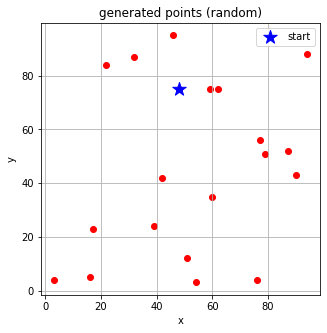

[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0] False


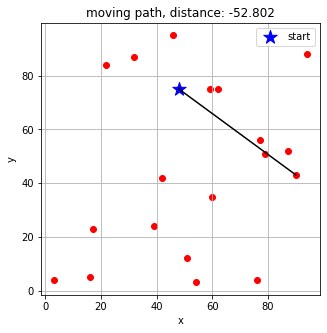

[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0] False


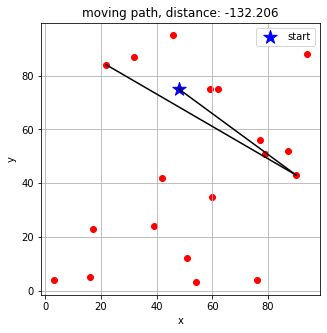

[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0] False


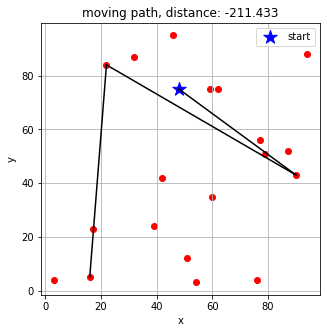

[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0] False


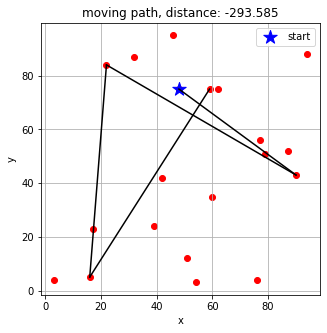

[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0] False


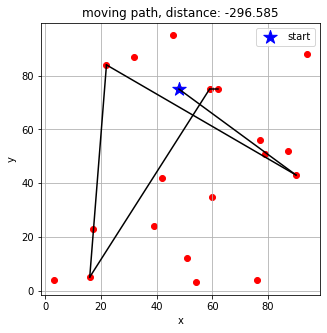

[-1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0] False


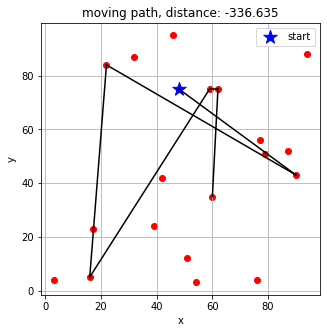

[-1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0] False


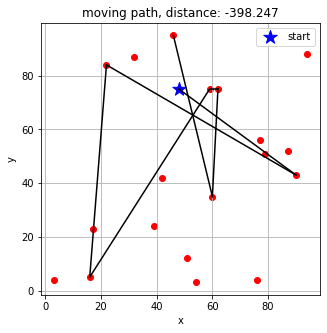

[-1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0] False


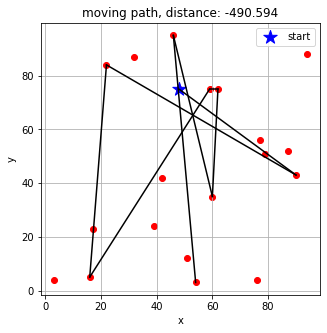

[-1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0] False


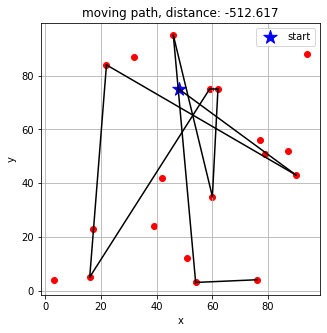

[-1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0] False


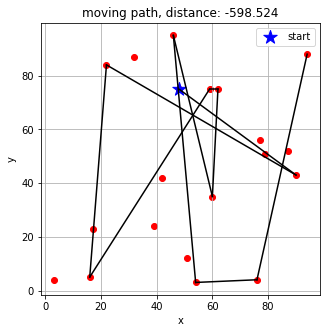

[-1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0] False


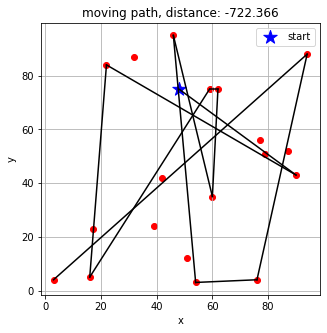

[-1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0] False


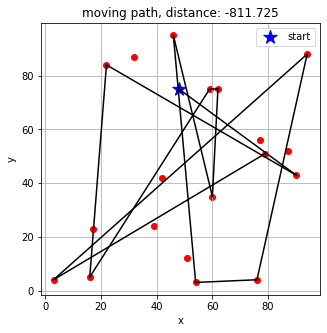

[-1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0] False


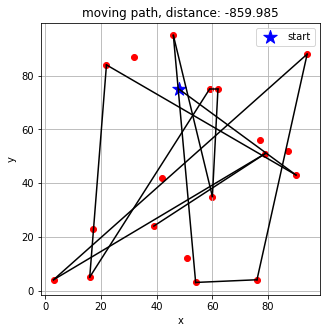

[-1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0] False


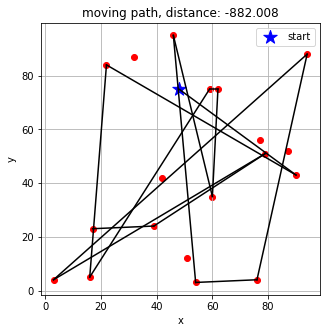

[-1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0] False


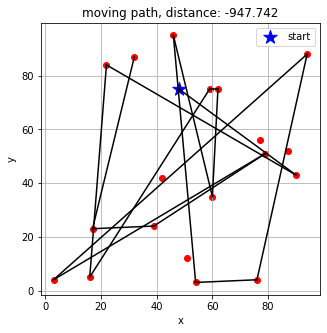

[1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0] False


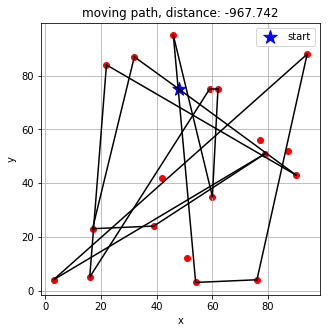

[1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0] False


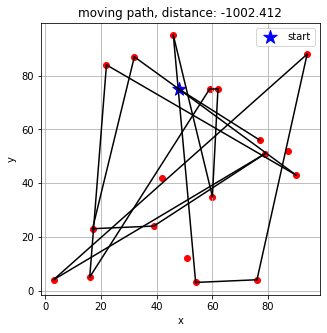

[1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] False


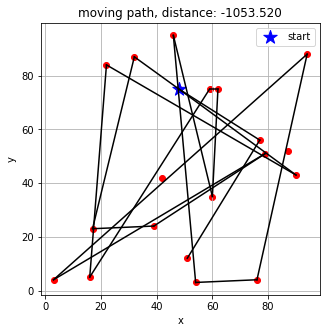

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] True
done. iteration:19


In [60]:
import numpy as np 

rand_generator = random_generator(num=20)
rand_generator.visualize()
env = environment(points_obj=rand_generator)
done = False 
i = 0 
state =env.reset()
while not done : 
    #random_mover_action = np.random.randint(0,20)
 
    possible_node = (np.where(np.array(state)==-1)[0])
    random_mover_action=random.choice(possible_node)
    state,reward,done,=env.transition(random_mover_action)
    print(state,done)
    possible_node = (np.where(np.array(state)==-1)[0])
    i+=1
    if done :
        break
    else:env.visualize(save=i+1,save_name='random_mover')


print(f"done. iteration:{i}")

In [67]:
'image_3.png'.split("_")[1][0]

'3'

In [96]:
import os
from PIL import Image
from IPython.display import Image as Img
from IPython.display import display

def generate_gif(path,name):
    img_list = os.listdir(path)
    img_list = [path + '/' + x for x in img_list]
    img_list = sorted(img_list, key=lambda x : int(x.split('_')[-1][0]))
    images = [Image.open(x) for x in img_list]
    im = images[0]
    im.save(name+'.gif', save_all=True, append_images=images[1:],loop=0xff, duration=500)
    # loop 반복 횟수
    # duration 프레임 전환 속도 (500 = 0.5초)
    return Img(url=name+'.gif')

In [97]:
generate_gif(path="random_mover",name='random_mover')

In [98]:
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 50000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(20, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,20)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        possible_node = (np.where(np.array(obs)==-1)[0])
        if coin < epsilon:
            #print(np.where(np.array(obs)==-1))
            return random.choice(possible_node)
        else :
            index = out[possible_node].argmax()
            return possible_node[index]
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [100]:

q = Qnet()
q_target = Qnet()
q_target.load_state_dict(q.state_dict())
memory = ReplayBuffer()

print_interval = 20
score = 0.0  
optimizer = optim.Adam(q.parameters(), lr=learning_rate)
score_history= []
for n_epi in range(3000):
    epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
    s = env.reset(random_init=True)
    done = False
    n_step =0 
    while not done:
        n_step +=1
        a = q.sample_action(torch.from_numpy(np.array(s)).float(), epsilon)      
        s_prime, r, done = env.transition(a)
        done_mask = 0.0 if done else 1.0
        memory.put((s,a,r,s_prime, done_mask))

        score += r
        if done:
            break
        s = s_prime
        
    if memory.size()>2000:
        train(q, q_target, memory, optimizer)

    if n_epi%print_interval==0 and n_epi!=0:
        q_target.load_state_dict(q.state_dict())
        print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%, n_step:{}".format(n_epi, score/print_interval, memory.size(), epsilon*100, n_step))
        score_history.append(score/print_interval)
        score = 0.0

n_episode :20, score : -1016.6, n_buffer : 399, eps : 7.9%, n_step:19
n_episode :40, score : -978.2, n_buffer : 779, eps : 7.8%, n_step:19
n_episode :60, score : -964.4, n_buffer : 1159, eps : 7.7%, n_step:19
n_episode :80, score : -946.1, n_buffer : 1539, eps : 7.6%, n_step:19
n_episode :100, score : -989.4, n_buffer : 1919, eps : 7.5%, n_step:19
n_episode :120, score : -1009.2, n_buffer : 2299, eps : 7.4%, n_step:19
n_episode :140, score : -1000.7, n_buffer : 2679, eps : 7.3%, n_step:19
n_episode :160, score : -989.0, n_buffer : 3059, eps : 7.2%, n_step:19
n_episode :180, score : -966.2, n_buffer : 3439, eps : 7.1%, n_step:19
n_episode :200, score : -901.4, n_buffer : 3819, eps : 7.0%, n_step:19
n_episode :220, score : -890.9, n_buffer : 4199, eps : 6.9%, n_step:19
n_episode :240, score : -845.9, n_buffer : 4579, eps : 6.8%, n_step:19
n_episode :260, score : -894.4, n_buffer : 4959, eps : 6.7%, n_step:19
n_episode :280, score : -932.0, n_buffer : 5339, eps : 6.6%, n_step:19
n_episode

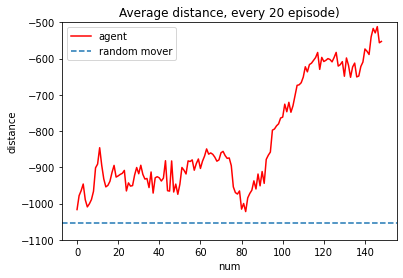

In [127]:
import seaborn as sns
import pandas as pd 
score_df = pd.DataFrame(score_history,columns =['distance'])
score_df= score_df.reset_index()
plt.figure()
line_plot= sns.lineplot(x='index', y='distance',data=score_df, color='red', label='agent')
line_plot.axhline(-1053.768,linestyle='--', label='random mover')
plt.legend()
plt.ylim(-1100,-500)
plt.title("Average distance, every 20 episode)")
plt.xlabel("num")
plt.savefig("performence_curve.png")
plt.show()


[-1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


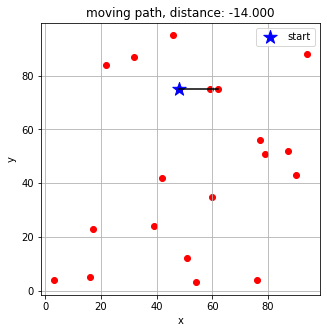

[1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


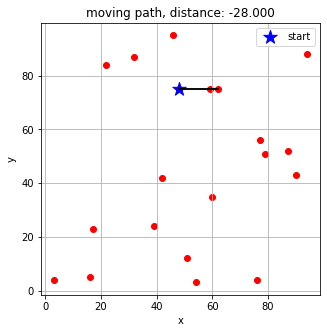

[1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0]


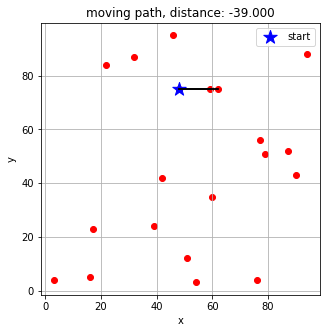

[1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0]


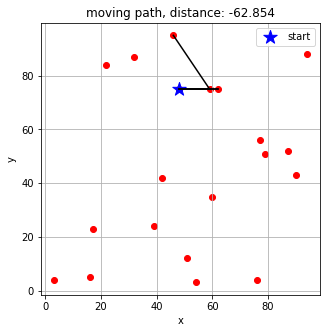

[1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0]


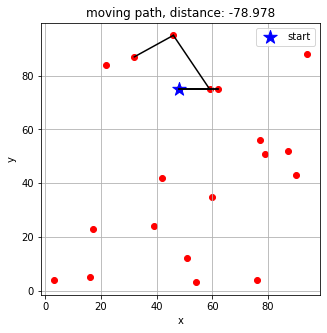

[1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0]


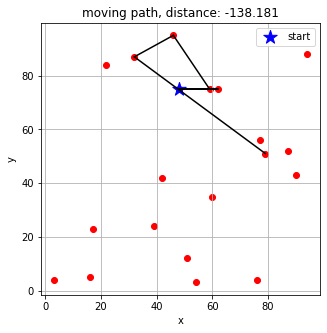

[1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0]


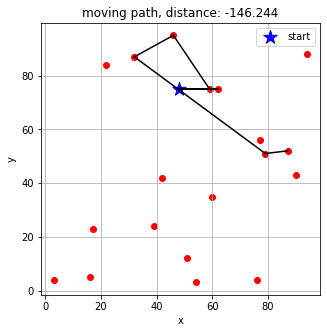

[1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0]


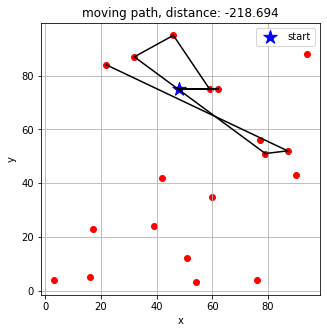

[1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0]


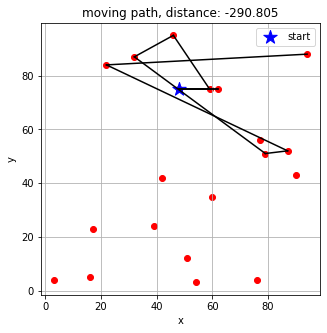

[1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0]


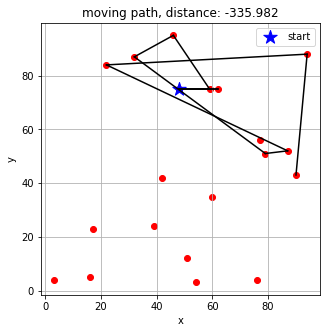

[1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0]


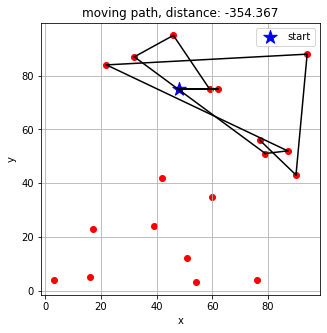

[1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0]


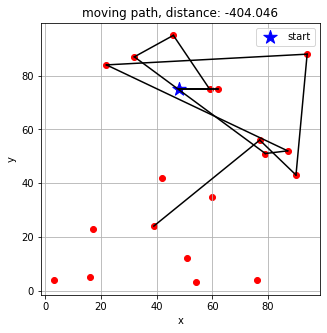

[1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0]


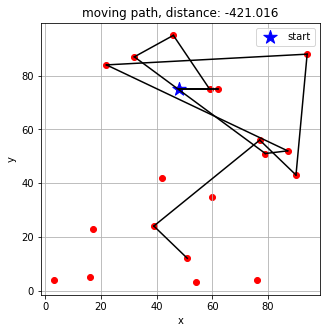

[1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0]


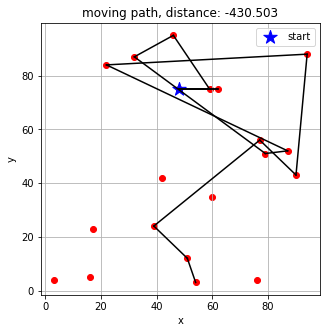

[1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0]


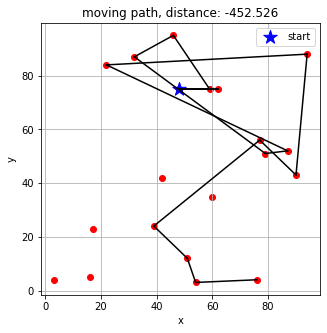

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0]


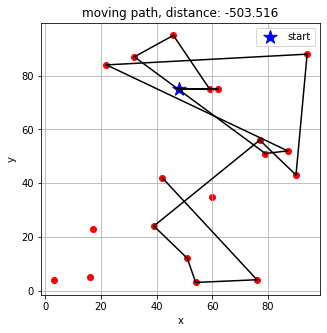

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


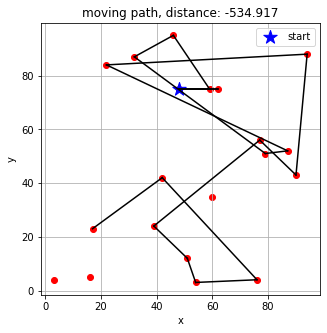

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


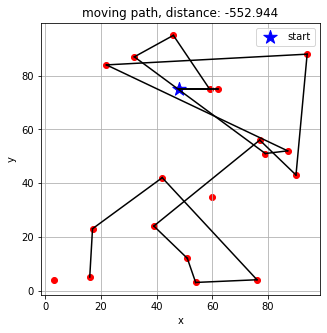

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


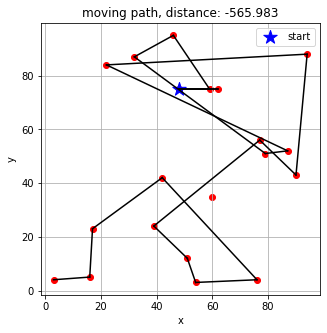

In [123]:


s = env.reset()
done = False
i = 0 
while not done:
    n_step +=1
    a = q.sample_action(torch.from_numpy(np.array(s)).float(), epsilon=0.01)   
    s_prime, r, done = env.transition(a)
    s = s_prime
    print(s)
    i+=1

    if done:
            break
    else : env.visualize(save=i+1, save_name='DQN_agent')
env.visualize(save=i+1, save_name='DQN_agent')

In [124]:
generate_gif(path="DQN_agent",name='DQN_agent')